In [100]:
import matplotlib.pyplot as plt 
import numpy as np
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [101]:
iris = load_iris()

In [102]:
X = iris.data
y = iris.target

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) # criterion="entropy" de yazılabilir
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [105]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [106]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
  
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Figure size 640x480 with 0 Axes>

<Axes: >

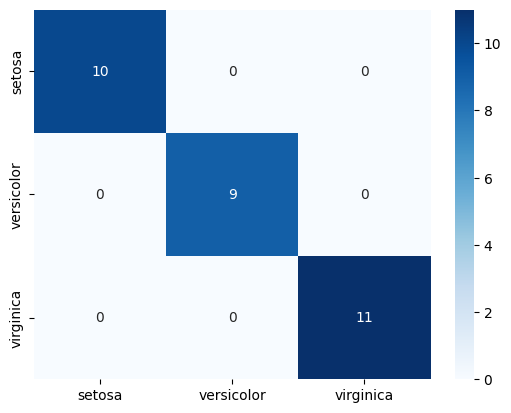

In [107]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

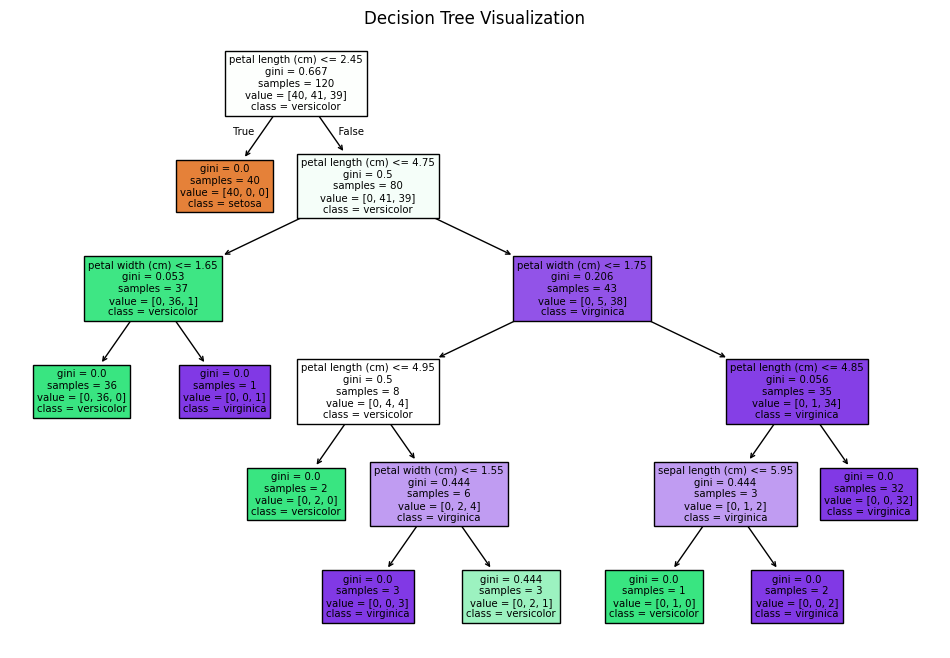

In [108]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.title("Decision Tree Visualization")
plt.show()

In [109]:
model.feature_importances_ # burada en önemli özelliklerin önem derecelerini görebiliriz
iris.feature_names[np.argmax(model.feature_importances_)] # en önemli özelliğin ismi yukarıdaki ağaçta da en üst düzeyde yer alıyor

'petal length (cm)'

sepal width (cm): 0.0
sepal length (cm): 0.016952744225471498
petal width (cm): 0.07849499604256478
petal length (cm): 0.9045522597319637


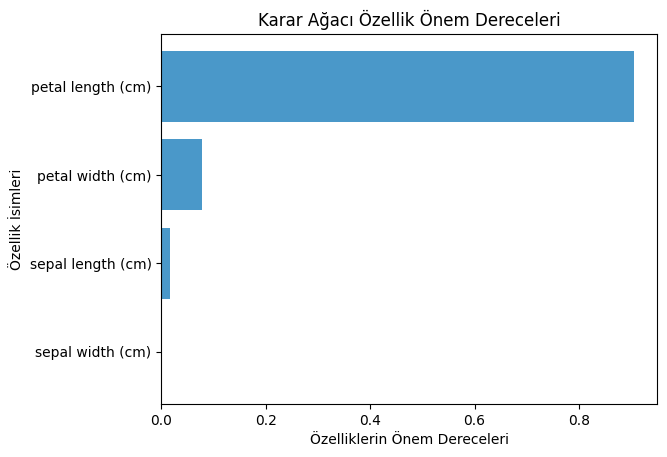

In [110]:
feature_importances = model.feature_importances_
feature_names = iris.feature_names

sorted_indices = np.argsort(feature_importances)  # küçükten büyüğe

for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")
    plt.barh(feature_names[i], feature_importances[i], color=plt.cm.Blues(0.6))

plt.xlabel("Özelliklerin Önem Dereceleri")
plt.ylabel("Özellik İsimleri")
plt.title("Karar Ağacı Özellik Önem Dereceleri")
plt.show()


In [111]:
warnings.filterwarnings("ignore")

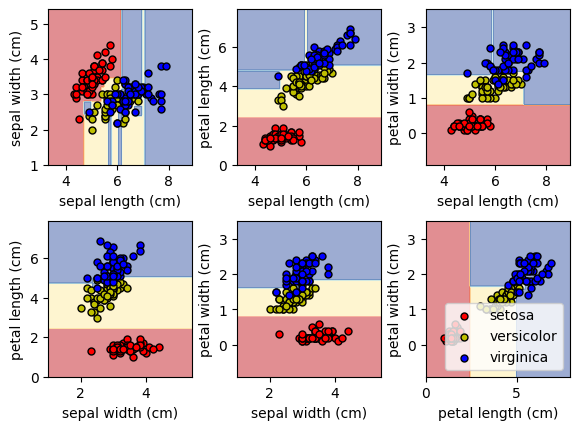

In [113]:
for pairidx, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair] # İki özellikli veri seti
    y = iris.target

    model = DecisionTreeClassifier()
    model.fit(X, y)

    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", ax=ax, cmap=plt.cm.RdYlBu, alpha=0.5, xlabel=iris.feature_names[pair[0]], ylabel=iris.feature_names[pair[1]])

    plot_colors = "ryb"

    for i, color in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='k', s=25, cmap=plt.cm.RdYlBu)
        
plt.legend()

**Amaç:** Bu görselleştirme ile, karar ağacının farklı özellik çiftleri üzerinde nasıl çalıştığını, hangi özelliklerin sınıfları ayırmada daha etkili olduğunu ve modelin karar sınırlarının veri üzerinde nasıl şekillendiğini kolayca gözlemleyebiliriz. Böylece hem modelin davranışını hem de veri setinin yapısını daha iyi anlayabiliriz.

* Mesela 4. grafikte şöyle bir yorum yapabiliriz: Sepal width ve petal length birlikte kullanıldığında, sınıflar daha net ayrılabiliyor. Karar sınırları daha keskin. Mesela petal length değeri 2.2 cm in altındaysa setosa, 2.2 cm ile 4.8 cm arasında ise versicolor, 4.8 cm in üstünde ise virginica sınıfına ait olur. Bu grafikler üzerinden kesin sonuçlara varmak doğru değildir. Bunlar yorum yapmak için kullanılır.